# Presets

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from presets import Preset
import librosa as _librosa # using a mock of librosa to use presets

In [3]:
librosa = Preset(_librosa)

# overriding default parameters
librosa['sr'] = 44100
librosa['hop_length'] = 1024
librosa['n_fft'] = 4096

[Text(0.5, 1.0, '11025/1024/4096')]

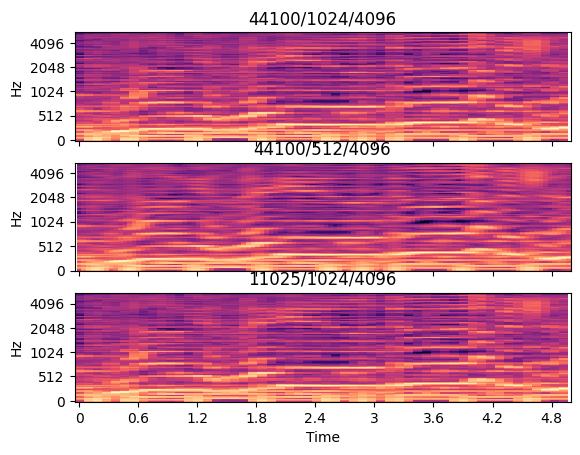

In [8]:
y, sr = librosa.load(librosa.ex('fishin'), duration = 5, offset = 35)
M = librosa.feature.melspectrogram(y = y)
M_highres = librosa.feature.melspectrogram(y = y, hop_length = 512) # overriding new default value; more temporal resolution as more frequent time steps

fig, ax = plt.subplots(nrows = 3, sharex = True, sharey = True)

librosa.display.specshow(librosa.power_to_db(M, ref = np.max), y_axis = 'mel', x_axis = 'time', ax = ax[0])
ax[0].set(title = '44100/1024/4096')
ax[0].label_outer()


librosa.display.specshow(librosa.power_to_db(M_highres, ref = np.max), hop_length = 512, y_axis = 'mel', x_axis='time', ax = ax[1])
ax[1].set(title = '44100/512/4096')
ax[1].label_outer()

librosa['sr'] = 11025

y2, sr2 = librosa.load(librosa.ex('fishin'), duration = 5, offset = 35)
M2 = librosa.feature.melspectrogram(y = y2, sr = sr2)

librosa.display.specshow(librosa.power_to_db(M2, ref = np.max), y_axis = 'mel', x_axis = 'time', ax = ax[2])
ax[2].set(title = '11025/1024/4096')